In [20]:
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise import SVD
from surprise.model_selection import train_test_split

# Load the u.data dataset
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file('data/u.data', reader=reader)

# Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25)

# Train the SVD algorithm on the training set
algo = SVD()
algo.fit(trainset)

# Get the predictions for the test set
predictions = algo.test(testset)

# Compute the MAE for all users
overall_mae = accuracy.mae(predictions, verbose=False)

# Print the average MAE for all users
print(f"Average MAE for all users: {overall_mae}")


Average MAE for all users: 0.7494971340275407


In [25]:
# Compute the per-user MAE
user_errors = {}
user_counts = {}
for uid, iid, true_r, est, _ in predictions:
    error = abs(true_r - est)
    if uid in user_errors:
        user_errors[uid] += error
        user_counts[uid] += 1
    else:
        user_errors[uid] = error
        user_counts[uid] = 1

mae_per_user = {}
for uid in user_errors:
    mae_per_user[uid] = user_errors[uid] / user_counts[uid]

# Print the overall MAE and the per-user MAE
#print(f"Overall MAE: {mae_overall}")
#for uid, mae in mae_per_user.items():
#    print(f"User {uid}: MAE = {mae}")


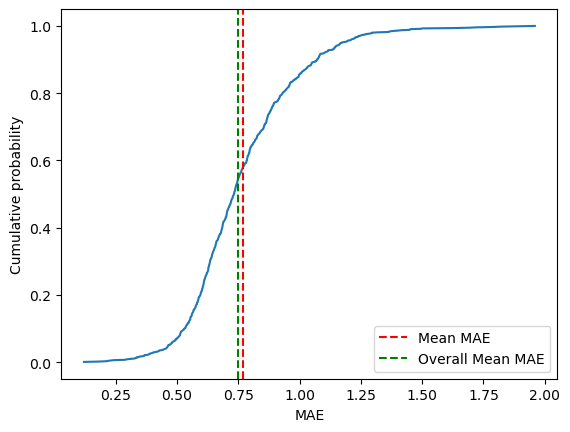

In [27]:
import matplotlib.pyplot as plt
import numpy as np
# Plot the cumulative distribution of each user's MAE

mae_values = list(mae_per_user.values())
mae_values.sort()
n_users = len(mae_values)
cumulative_probs = [float(i) / n_users for i in range(1, n_users + 1)]
plt.plot(mae_values, cumulative_probs)

# Draw a vertical line at the mean point
mean_mae = np.mean(mae_values)
plt.axvline(x=mean_mae, linestyle='--', color='r', label='Mean MAE')

# Draw a vertical line at the overall mean MAE
plt.axvline(x=overall_mae, linestyle='--', color='g', label='Overall Mean MAE')

# Label the axes and add a legend
plt.xlabel('MAE')
plt.ylabel('Cumulative probability')
plt.legend()

# Show the plot
plt.show()

In [28]:
# Compute the MAE per movie
movie_errors = {}
movie_counts = {}
for uid, iid, true_r, est, _ in predictions:
    error = abs(true_r - est)
    if iid in movie_errors:
        movie_errors[iid] += error
        movie_counts[iid] += 1
    else:
        movie_errors[iid] = error
        movie_counts[iid] = 1

mae_per_movie = {}
for iid in movie_errors:
    mae_per_movie[iid] = movie_errors[iid] / movie_counts[iid]



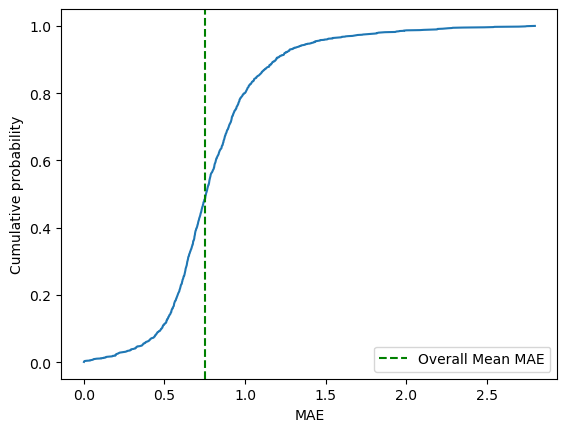

In [29]:
# Plot the cumulative distribution of each movie's MAE
mae_values = list(mae_per_movie.values())
mae_values.sort()
n_movies = len(mae_values)
cumulative_probs = [float(i) / n_movies for i in range(1, n_movies + 1)]
plt.plot(mae_values, cumulative_probs)

# Draw a vertical line at the overall mean MAE
plt.axvline(x=overall_mae, linestyle='--', color='g', label='Overall Mean MAE')

# Label the axes and add a legend
plt.xlabel('MAE')
plt.ylabel('Cumulative probability')
plt.legend()

# Show the plot
plt.show()